In [12]:
from keras import models, layers
import numpy as np
import cv2
import matplotlib.pyplot as plt

def build_custom_cnn_5class(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='sigmoid')
    ])
    return model





In [13]:
# Load your image
image_path = "shark.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
input_shape = image.shape  # Get input shape
# Reshape the image to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

In [14]:
input_shape

(421, 612, 3)

In [15]:
image

array([[[[  0,  86, 103],
         [  0,  86, 103],
         [  0,  86, 103],
         ...,
         [ 45, 153, 163],
         [ 45, 153, 163],
         [ 44, 152, 162]],

        [[  0,  86, 103],
         [  0,  86, 103],
         [  0,  85, 102],
         ...,
         [ 46, 154, 164],
         [ 45, 153, 163],
         [ 45, 153, 163]],

        [[  0,  86, 103],
         [  0,  86, 103],
         [  0,  86, 103],
         ...,
         [ 57, 165, 175],
         [ 56, 164, 174],
         [ 56, 164, 174]],

        ...,

        [[ 12, 131, 161],
         [ 12, 131, 161],
         [ 12, 131, 161],
         ...,
         [ 55, 193, 203],
         [ 55, 193, 203],
         [ 55, 193, 203]],

        [[ 12, 131, 161],
         [ 12, 131, 161],
         [ 12, 131, 161],
         ...,
         [ 55, 193, 203],
         [ 55, 193, 203],
         [ 55, 193, 203]],

        [[ 12, 131, 161],
         [ 12, 131, 161],
         [ 12, 131, 161],
         ...,
         [ 55, 193, 203],
        

1/1 [==============================] - 0s 349ms/step


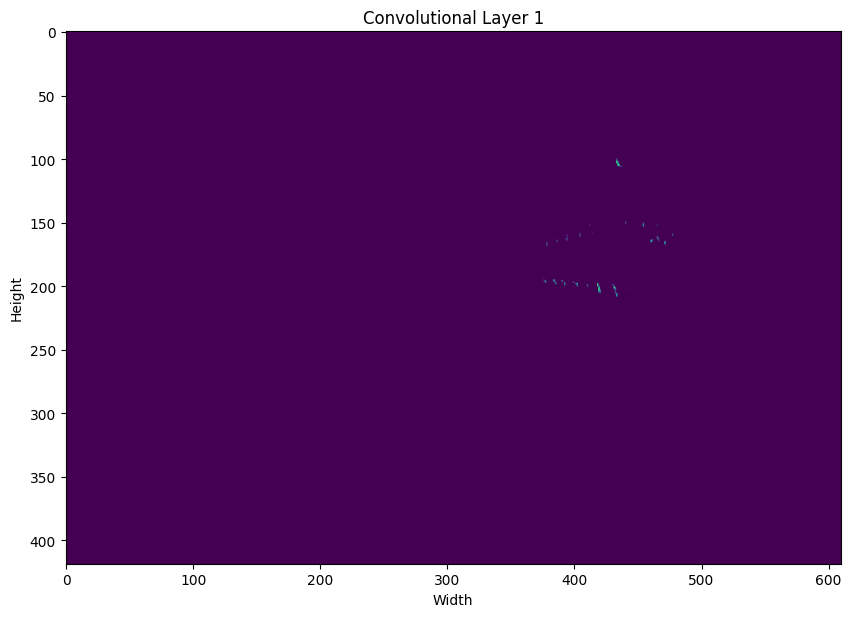

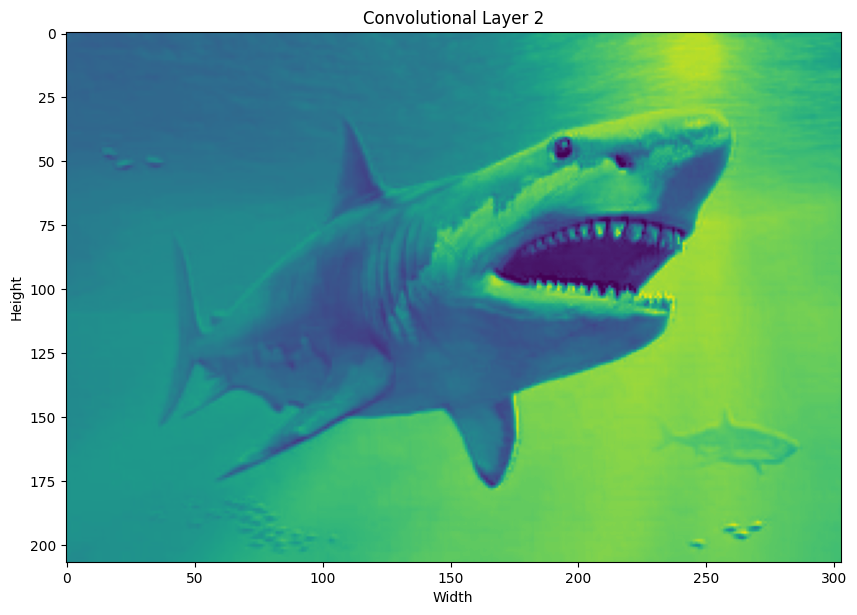

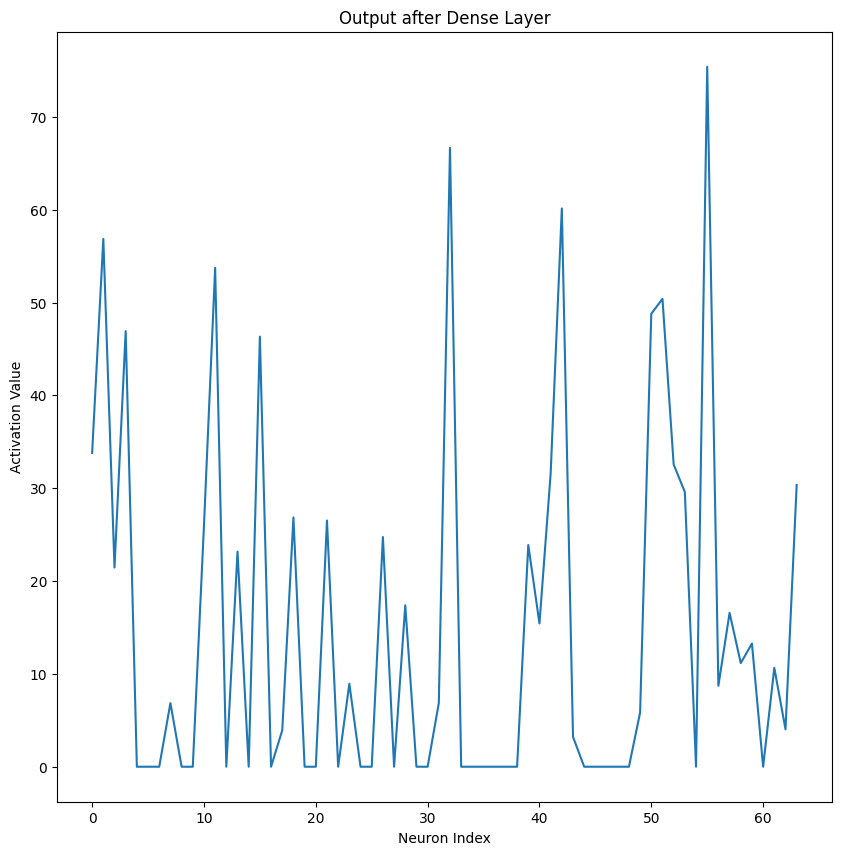

In [16]:
# Create the model
model = build_custom_cnn_5class(input_shape)

# Define a new model to output the activations of convolutional layers
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
layer_outputs.append(model.layers[-2].output)  # Output after the dense layer
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(image)

# Plot the output of each convolutional layer
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 10))
    if i < len(layer_outputs) - 1:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')  # Plot the first channel of each activation map
        plt.title(f'Convolutional Layer {i+1}')
        plt.xlabel('Width')
        plt.ylabel('Height')
    else:
        plt.plot(activation[0])  # Plot the output after the dense layer
        plt.title('Output after Dense Layer')
        plt.xlabel('Neuron Index')
        plt.ylabel('Activation Value')

    plt.show()